In [31]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

| Variable Name | Role    | Type        | Demographic      | Description                                                                                                                                                                                                                                      | Units | Missing Values |
|---------------|---------|-------------|------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------|----------------|
| age           | Feature | Integer     | Age              |                                                                                                                                                                                                                                                  |        | no             |
| job           | Feature | Categorical | Occupation       | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')                                                                  |        | no             |
| marital       | Feature | Categorical | Marital Status   | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)                                                                                                                              |        | no             |
| education     | Feature | Categorical | Education Level  | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')                                                                                                                  |        | no             |
| default       | Feature | Binary      |                  | has credit in default?                                                                                                                                                                                                                          |        | no             |
| balance       | Feature | Integer     |                  | average yearly balance                                                                                                                                                                                                                          | euros  | no             |
| housing       | Feature | Binary      |                  | has housing loan?                                                                                                                                                                                                                               |        | no             |
| loan          | Feature | Binary      |                  | has personal loan?                                                                                                                                                                                                                              |        | no             |
| contact       | Feature | Categorical |                  | contact communication type (categorical: 'cellular','telephone')                                                                                                                                                                               |        | yes            |
| day_of_week   | Feature | Date        |                  | last contact day of the week                                                                                                                                                                                                                    |        | no             |
| month         | Feature | Date        |                  | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                                                                                                                               |        | no             |
| duration      | Feature | Integer     |                  | last contact duration, in seconds (numeric). **Note**: this attribute highly affects the output target and should be used only for benchmarking, not real modeling.                                                                             |        | no             |
| campaign      | Feature | Integer     |                  | number of contacts performed during this campaign and for this client (includes last contact)                                                                                                                                                   |        | no             |
| pdays         | Feature | Integer     |                  | number of days since the client was last contacted from a previous campaign (-1 means not previously contacted)                                                                                                                                |        | yes            |
| previous      | Feature | Integer     |                  | number of contacts performed before this campaign and for this client                                                                                                                                                                           |        | no             |
| poutcome      | Feature | Categorical |                  | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')                                                                                                                                                     |        | yes            |
| y             | Target  | Binary      |                  | has the client subscribed a term deposit?                                                                                                                                                                                                       |        | no             |


In [32]:
df= pd.read_csv('dataset/bank-additional-full.csv', sep= ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [33]:
CatCols = df.select_dtypes(include=['object', 'category']).columns
NumCols= df.select_dtypes(include=['number']).columns

In [34]:
CatCols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

## Categorical Analysis

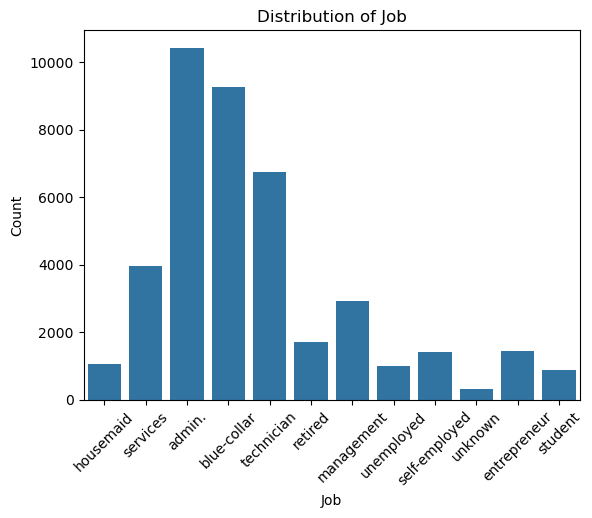

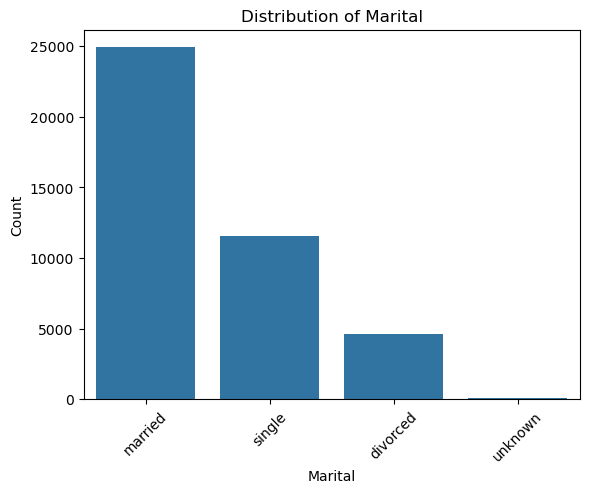

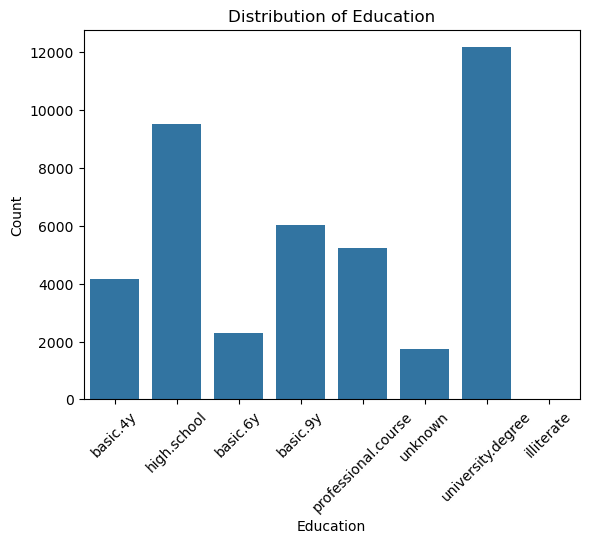

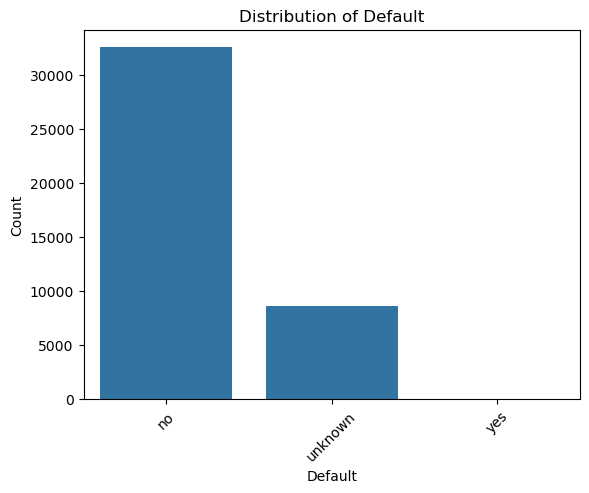

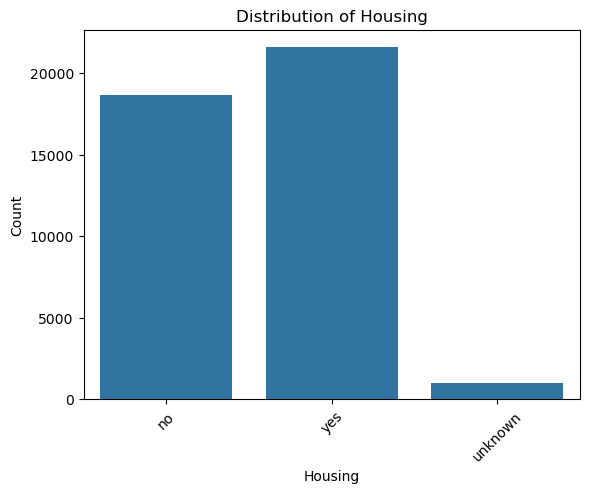

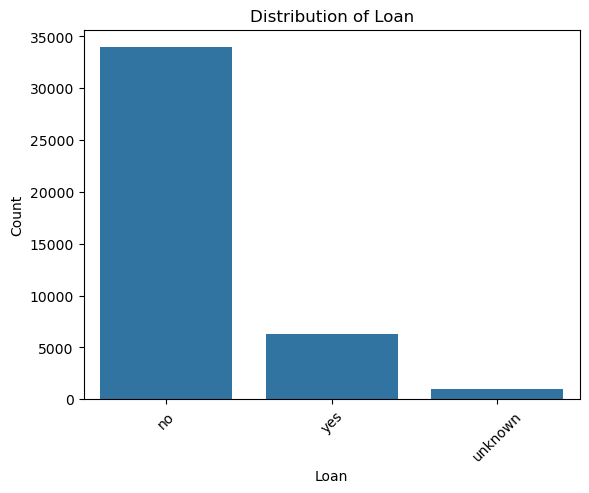

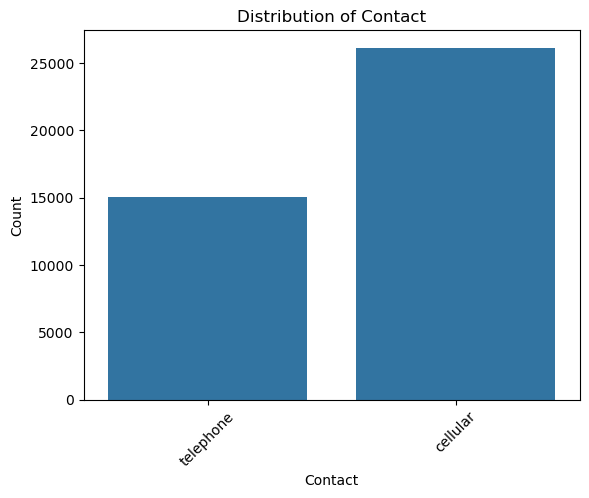

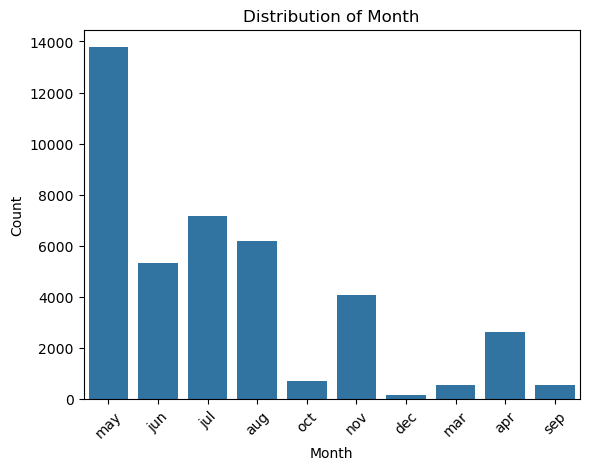

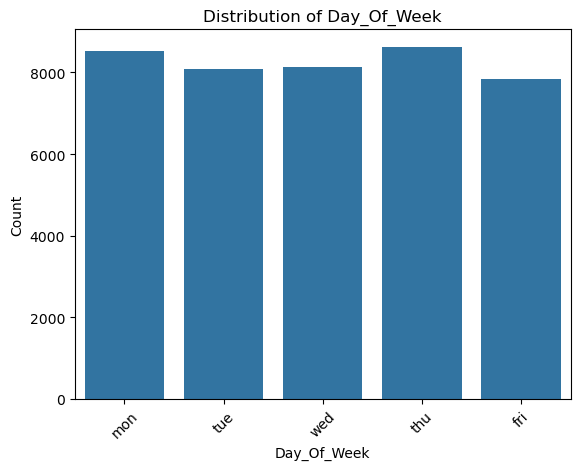

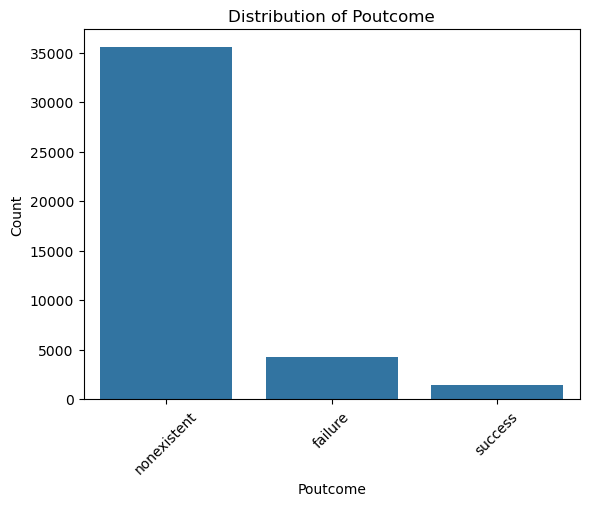

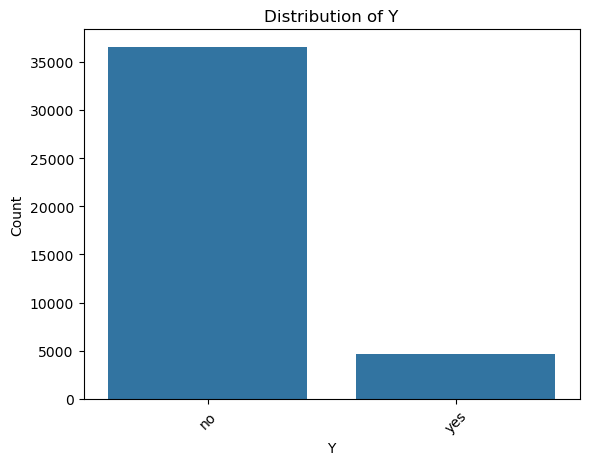

In [ ]:
for col in CatCols:
    figsize=(12,6)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col.title()}')
    plt.xlabel(col.title())
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.show()

## Numerical Analysis

C:\Users\user\AppData\Local\Temp\ipykernel_17492\2541682659.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['y'], palette='Set2')


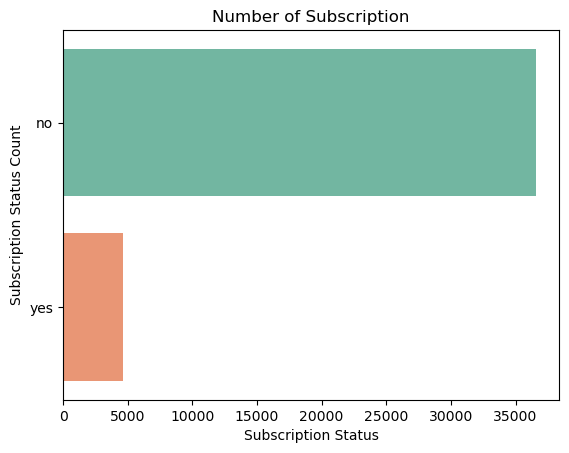

In [ ]:
sns.countplot(df['y'], palette='Set2')
plt.title('Number of Subscription')
plt.xlabel('Subscription Status')
plt.ylabel('Subscription Status Count')
plt.show()

## Relationship with target variable

IndexError: index 5 is out of bounds for axis 0 with size 5

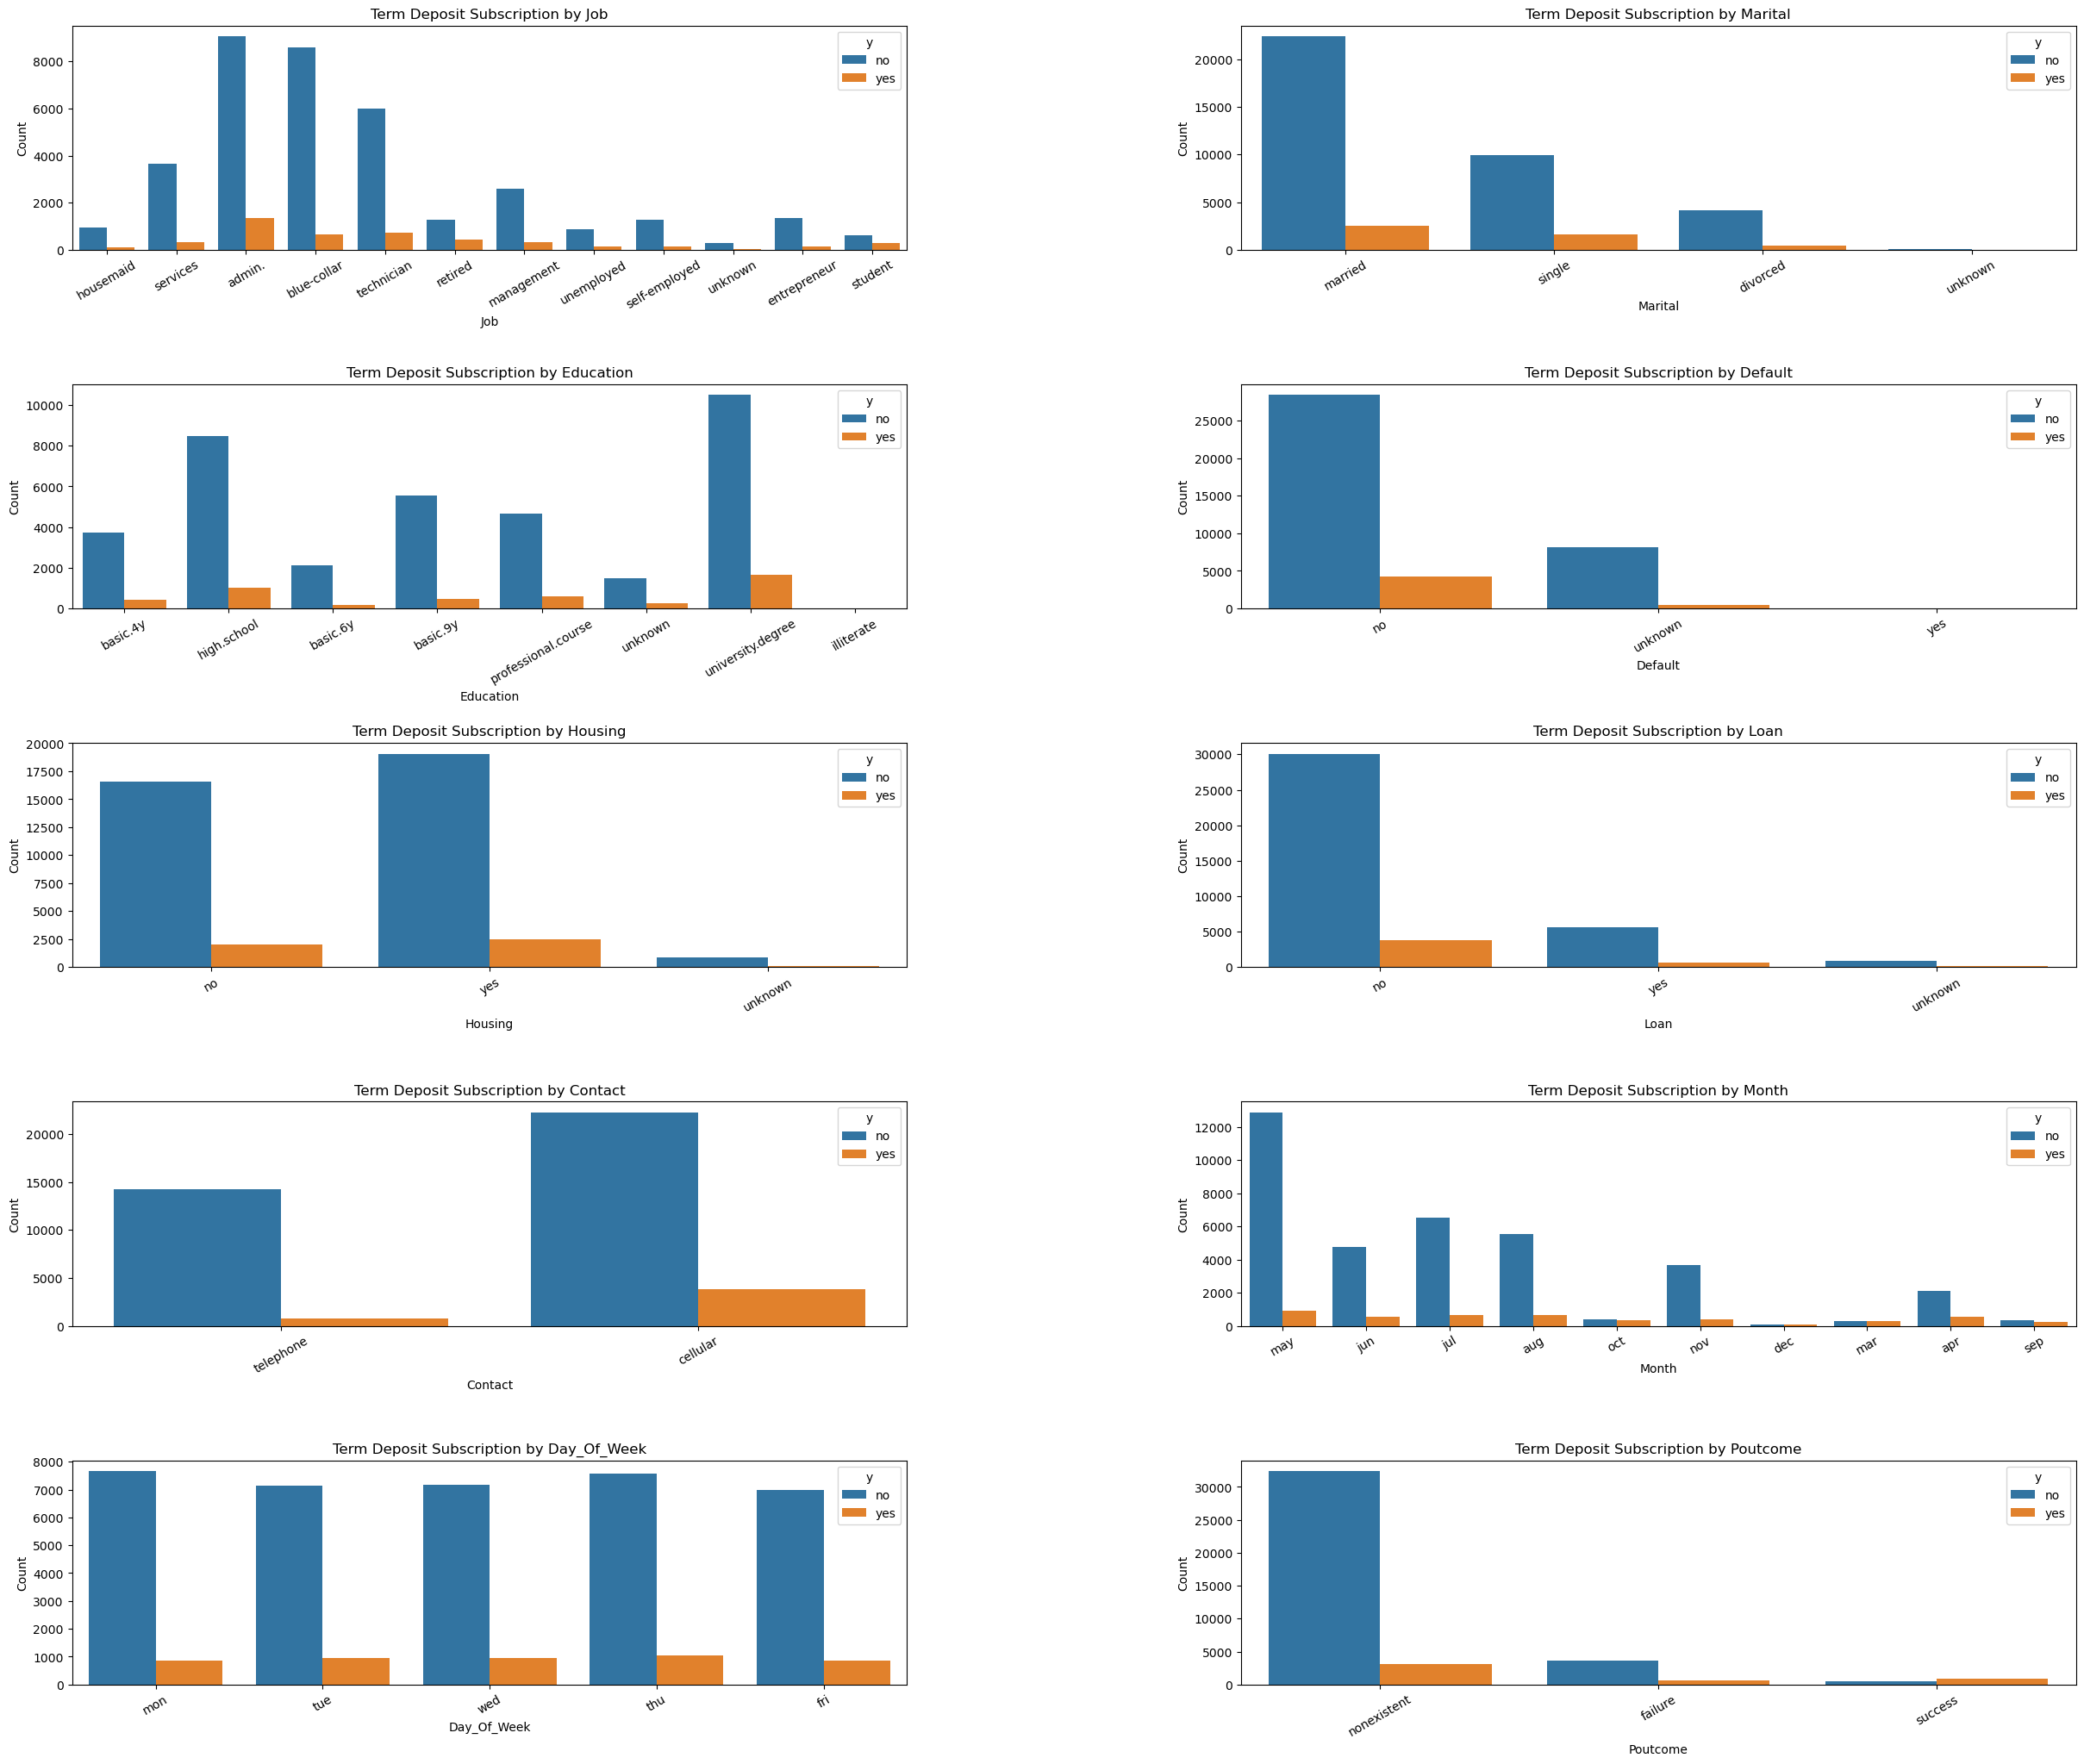

In [56]:
fig, ax= plt.subplots(figsize=(30,25), ncols=2, nrows=len(CatCols)//2)
plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Manually adjust gaps


for i, col in enumerate(CatCols):
    sns.countplot(data=df, x=col, hue='y', ax=ax[i//2, i % 2])
    ax[i//2, i % 2].set_title(f'Term Deposit Subscription by {col.title()}')
    ax[i//2, i % 2].set_xlabel(col.title())
    ax[i//2, i % 2].set_ylabel('Count')
    ax[i//2, i % 2].tick_params(axis='x', rotation=30)

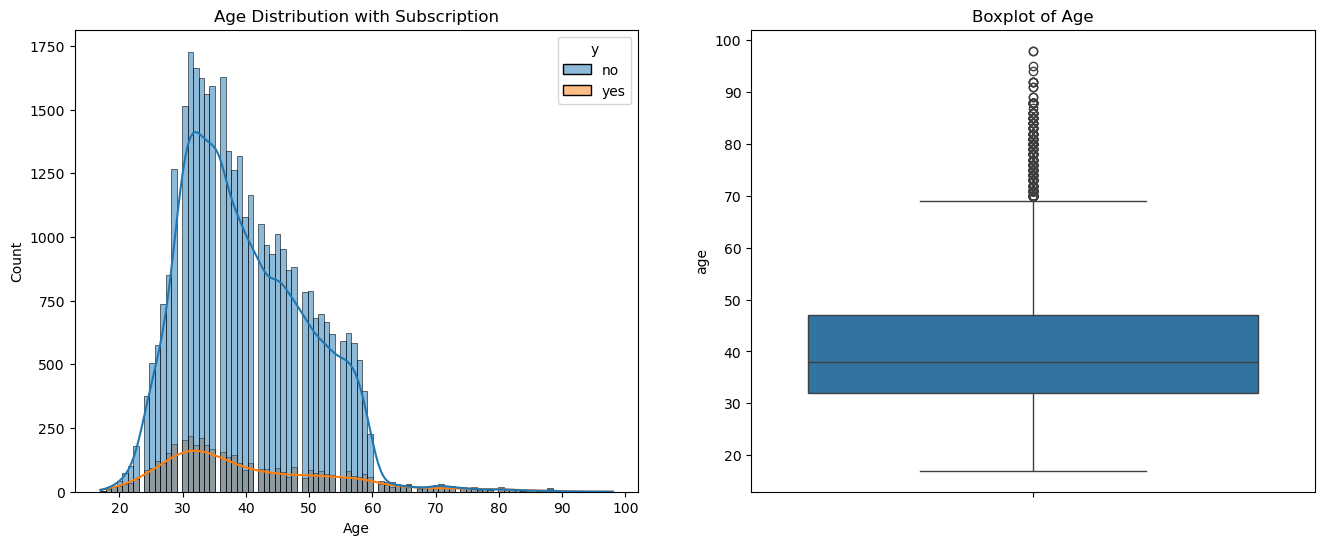

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=df, x='age', hue='y', kde=True, ax= axes[0])
axes[0].set_title('Age Distribution with Subscription')
axes[0].set_xlabel('Age')

sns.boxplot(data= df['age'], ax=axes[1])
axes[1].set_title('Boxplot of Age')

plt.show()